# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

##### 2.1 What conditions are required to make the BFS return the optimal solution ?

Ans:
1. costs between nodes should be positive value
2. sort method should be defined at each searching step

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

Ans:  
1. BFS > DFS:  
When Optimal soulution is necessary
2. DFS > BFS:  
Need better space complexity

##### 2.4 When can we use machine learning ?

Ans:  
1. Classification
2. Regression

##### 2.5 What is the gradient of a function ?

Ans:  
My Opinion:
Tangent vector of one point which belongs to a function. Tangent vector should include directions and scales that can indicate changing direction and rate.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Ans:  
along with gradient directions, set learning rate, then find out maximum value.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
import requests
import json
import collections

response = requests.get('http://map.amap.com/service/subway?_1579184320582&srhdata=3100_drw_shanghai.json') 
res_cont = response.text

json_obj = json.loads(res_cont)

station_info = dict()
line_connection_info = collections.defaultdict(list)
train_lines = json_obj['l']
for line in train_lines:
    line_connection_info[line['ln'] + line['la']].extend([station['n'] for station in line['st']])
    for st in line['st']:
        station_info[st['n']] = tuple([int(l) for l in st['p'].split(' ')])

print(station_info)
print(line_connection_info)

{'莘庄': (650, 1137), '外环路': (681, 1111), '莲花路': (702, 1091), '锦江乐园': (730, 1065), '上海南站': (746, 1050), '漕宝路': (779, 1011), '上海体育馆': (809, 925), '徐家汇': (861, 868), '衡山路': (894, 838), '常熟路': (959, 798), '陕西南路': (1009, 805), '黄陂南路': (1107, 798), '人民广场': (1139, 743), '新闸路': (1091, 701), '汉中路': (1074, 657), '上海火车站': (1075, 588), '中山北路': (1111, 549), '延长路': (1141, 504), '上海马戏城': (1141, 448), '汶水路': (1141, 406), '彭浦新村': (1141, 350), '共康路': (1141, 294), '通河新村': (1141, 252), '呼兰路': (1141, 197), '共富新村': (1141, 154), '宝安公路': (1141, 98), '友谊西路': (1141, 42), '富锦路': (1141, 0), '浦东国际机场': (1697, 1204), '海天三路': (1697, 1177), '远东大道': (1697, 1149), '凌空路': (1697, 1121), '川沙': (1697, 1093), '华夏东路': (1665, 1065), '创新中路': (1649, 1050), '唐镇': (1632, 1037), '广兰路': (1583, 1023), '金科路': (1550, 1023), '张江高科': (1501, 1023), '龙阳路': (1452, 1021), '世纪公园': (1452, 980), '上海科技馆': (1452, 925), '世纪大道': (1370, 827), '东昌路': (1321, 785), '陆家嘴': (1290, 755), '南京东路': (1189, 743), '南京西路': (1009, 743), '静安寺': (959, 743), '江苏路': (

In [43]:
station_connections = collections.defaultdict(set)
for line, line_stas in line_connection_info.items():
    for index in range(len(line_stas)):
        if index > 0:
            station_connections[line_stas[index]].add((line_stas[index - 1], line))
        if index < len(line_stas) - 1:
            station_connections[line_stas[index]].add((line_stas[index + 1], line))    

for station in station_connections:
    station_connections[station] = list(station_connections[station])
print(station_connections)

defaultdict(<class 'set'>, {'莘庄': [('外环路', '1号线'), ('春申路', '5号线莘庄--奉贤新城')], '外环路': [('莲花路', '1号线'), ('莘庄', '1号线')], '莲花路': [('外环路', '1号线'), ('锦江乐园', '1号线')], '锦江乐园': [('莲花路', '1号线'), ('上海南站', '1号线')], '上海南站': [('漕宝路', '1号线'), ('锦江乐园', '1号线'), ('石龙路', '3号线')], '漕宝路': [('龙漕路', '12号线'), ('上海体育馆', '1号线'), ('上海南站', '1号线'), ('桂林公园', '12号线')], '上海体育馆': [('徐家汇', '1号线'), ('漕宝路', '1号线'), ('上海体育场', '4号线')], '徐家汇': [('上海游泳馆', '11号线花桥-迪士尼'), ('衡山路', '1号线'), ('宜山路', '9号线'), ('上海游泳馆', '11号线嘉定北-迪士尼'), ('交通大学', '11号线花桥-迪士尼'), ('肇嘉浜路', '9号线'), ('交通大学', '11号线嘉定北-迪士尼'), ('上海体育馆', '1号线')], '衡山路': [('徐家汇', '1号线'), ('常熟路', '1号线')], '常熟路': [('静安寺', '7号线'), ('衡山路', '1号线'), ('肇嘉浜路', '7号线'), ('陕西南路', '1号线')], '陕西南路': [('上海图书馆', '10号线航中路-新江湾城'), ('嘉善路', '12号线'), ('新天地', '10号线航中路-新江湾城'), ('上海图书馆', '10号线虹桥火车站-新江湾城'), ('黄陂南路', '1号线'), ('南京西路', '12号线'), ('新天地', '10号线虹桥火车站-新江湾城'), ('常熟路', '1号线')], '黄陂南路': [('人民广场', '1号线'), ('陕西南路', '1号线')], '人民广场': [('南京西路', '2号线'), ('南京东路', '2号线'), ('黄陂南路', '1号线'), ('大世界', '8号线'), ('

##### 2. Preprocessing data

In [3]:
def get_geo_distance(origin, destination):
    origin_position = station_info[origin]
    destination_position = station_info[destination]
    
    distance_square = (destination_position[1] - origin_position[1]) ** 2 + \
                      (destination_position[0] - origin_position[0]) ** 2
    distance = distance_square ** 0.5
    return distance

get_geo_distance('富锦路', '汉中路')

660.4074499882629

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_info.keys()))

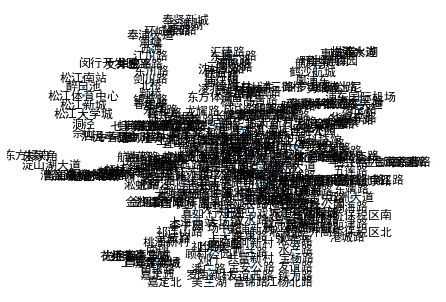

In [5]:
nx.draw(station_graph, station_info, with_labels=True, node_size=3)

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [45]:
# BFS
def bfs_search(origin_spot, dest_spot):
    paths = [[origin_spot]]
    visited = {origin_spot}
    counter = 0
    while True:
        counter += 1
        if counter >= 10000:
            print("Exceed max counter.")
            break
        current_node = paths.pop(0)
        current_dests = station_connections[current_node[-1]]
#         print(current_dests)
        for dest, line in current_dests:
            if dest in visited:
                continue
            new_node = current_node + [dest]
            if dest == dest_spot:
                return new_node
            paths.append(new_node)
            visited.add(dest)

' -> '.join(bfs_search('漕河泾开发区', '四平路'))
    

'漕河泾开发区 -> 桂林路 -> 宜山路 -> 徐家汇 -> 衡山路 -> 常熟路 -> 静安寺 -> 南京西路 -> 汉中路 -> 上海火车站 -> 宝山路 -> 海伦路 -> 邮电新村 -> 四平路'

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

In [46]:
def a_star_search(origin_spot, dest_spot):
    paths = [[origin_spot]]
    visited = {origin_spot}
    counter = 0
    while True:
        counter += 1
        if counter >= 10000:
            print("Exceed max counter.")
            break
        current_node = paths.pop(0)
        current_dests = station_connections[current_node[-1]]
#         print(current_dests)

        cost_list = list()
        for dest, line in current_dests:
            if dest in visited:
                continue
            new_node = current_node + [dest]
            if dest == dest_spot:
                return new_node
            visited.add(dest)
            cost = cost_count(new_node, dest)
            cost_list.append((new_node, cost))
        sorted_cost_list = sort_cost_list(cost_list)
        print(sorted_cost_list)
        paths.extend([node for node, cost in sorted_cost_list])
        

def cost_count(node_path, dest_spot):
    cost = 0
    for i in range(len(node_path) - 1):
        cost += get_geo_distance(node_path[i], node_path[i+1])
    cost += get_geo_distance(node_path[-1], dest_spot)
    return cost

def sort_cost_list(cost_list):
    return sorted(cost_list, key=lambda x: x[1])

' -> '.join(a_star_search('漕河泾开发区', '四平路'))

[(['漕河泾开发区', '合川路'], 47.0), (['漕河泾开发区', '桂林路'], 48.0)]
[(['漕河泾开发区', '合川路', '星中路'], 97.0)]
[(['漕河泾开发区', '桂林路', '宜山路'], 143.2732911156112)]
[(['漕河泾开发区', '合川路', '星中路', '七宝'], 147.0)]
[(['漕河泾开发区', '桂林路', '宜山路', '漕溪路'], 221.09359694898606), (['漕河泾开发区', '桂林路', '宜山路', '虹桥路'], 227.2732911156112), (['漕河泾开发区', '桂林路', '宜山路', '徐家汇'], 231.19370967694425)]
[(['漕河泾开发区', '合川路', '星中路', '七宝', '中春路'], 200.0)]
[(['漕河泾开发区', '桂林路', '宜山路', '漕溪路', '龙漕路'], 267.91239659186454)]
[(['漕河泾开发区', '桂林路', '宜山路', '虹桥路', '交通大学'], 261.2732911156112), (['漕河泾开发区', '桂林路', '宜山路', '虹桥路', '宋园路'], 277.56245495833184), (['漕河泾开发区', '桂林路', '宜山路', '虹桥路', '延安西路'], 284.2732911156112)]
[(['漕河泾开发区', '桂林路', '宜山路', '徐家汇', '衡山路'], 275.79191591889975), (['漕河泾开发区', '桂林路', '宜山路', '徐家汇', '上海体育馆'], 308.3493964407856), (['漕河泾开发区', '桂林路', '宜山路', '徐家汇', '肇嘉浜路'], 329.19370967694425), (['漕河泾开发区', '桂林路', '宜山路', '徐家汇', '上海游泳馆'], 330.19370967694425)]
[(['漕河泾开发区', '合川路', '星中路', '七宝', '中春路', '九亭'], 252.0)]
[(['漕河泾开发区', '桂林路', '宜山路', '漕溪路', '龙漕路', '龙华'], 

'漕河泾开发区 -> 桂林路 -> 宜山路 -> 虹桥路 -> 交通大学 -> 上海图书馆 -> 陕西南路 -> 南京西路 -> 汉中路 -> 上海火车站 -> 宝山路 -> 海伦路 -> 邮电新村 -> 四平路'

b. Find the path that requires minimum transfers between two stations.

In [ ]:
# BFS
def fewer_transfer_search(origin_spot, dest_spot):
    paths = [[origin_spot]]
    visited = {origin_spot}
    counter = 0
    while True:
        counter += 1
        if counter >= 10000:
            print("Exceed max counter.")
            break
        current_node = paths.pop(0)
        current_dests = station_connections[current_node[-1]]
#         print(current_dests)
        for dest, line in current_dests:
            if dest in visited:
                continue
            new_node = current_node + [dest]
            if dest == dest_spot:
                return new_node
            paths.append(new_node)
            visited.add(dest)

' -> '.join(bfs_search('漕河泾开发区', '四平路'))

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 